In [3]:
import mrob
import numpy as np
import math

In [4]:
graph = mrob.FGraph()

In [5]:
# graph.add_node_landmark_3d()
# point description - params by descriptor (by image)
#  
# image -> feature -> 3d_feature_coords -> descriptor -> add/update to mrob
# possible descriptors: orb/nn/
#
# descriptor ->desciption 
# 
#
#
# optimize only robot_trajectory
#
# how to optimize feature comparison (k-neighbours etc)
#   
# 

In [6]:
import cv2
from matplotlib import pyplot as plt
def show_img(img):
    plt.figure(figsize=(14,8))
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.plot()

In [7]:
img_1 = cv2.imread('/home/lakomchik/sata/slam_dataset/rgbd_dataset_freiburg1_xyz/rgb/1305031102.175304.png')
depth_1 = cv2.imread('/home/lakomchik/sata/slam_dataset/rgbd_dataset_freiburg1_xyz/depth/1305031102.160407.png', cv2.IMREAD_GRAYSCALE)
img_2 = cv2.imread('/home/lakomchik/sata/slam_dataset/rgbd_dataset_freiburg1_xyz/rgb/1305031102.211214.png')

In [47]:
def match_images(img_1, img_2):
    img1 = img_1.copy()
    img2 = img_2.copy()
    # orb = cv2.ORB_create()
    sift = cv2.SIFT_create() 
    kp_1, des_1 = sift.detectAndCompute(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY), None)
    kp_2, des_2 = sift.detectAndCompute(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY), None)
    print(des_1.shape)
    print(des_2.shape)
    bf = cv2.BFMatcher()  
    # matches = bf.match(des_1, des_2)
    matches = bf.knnMatch(des_1, des_2, k=2)
    
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.3*n.distance:
            good.append([m])


    # print(matches)
    img1 = cv2.drawKeypoints(img1, kp_1, None, color=(0,255,0), flags=0)
    # show_img(img1)
    img2 = cv2.drawKeypoints(img2, kp_2, None, color=(0,255,0), flags=0)
    # show_img(img2)
    img3 = cv2.drawMatchesKnn(img1,kp_1,img2,kp_2,good, None, flags=2)
    show_img(img3)
    return kp_1,kp_2,good, des_1, des_2

In [ ]:
def pixel2xyz(pixel):
    FX_DEPTH = 525.0  # focal length x
    FY_DEPTH = 525.0  # focal length y
    CX_DEPTH = 319.5  # optical center x
    CY_DEPTH = 239.5  # optical center y
    pass

(1985, 128)
(1584, 128)


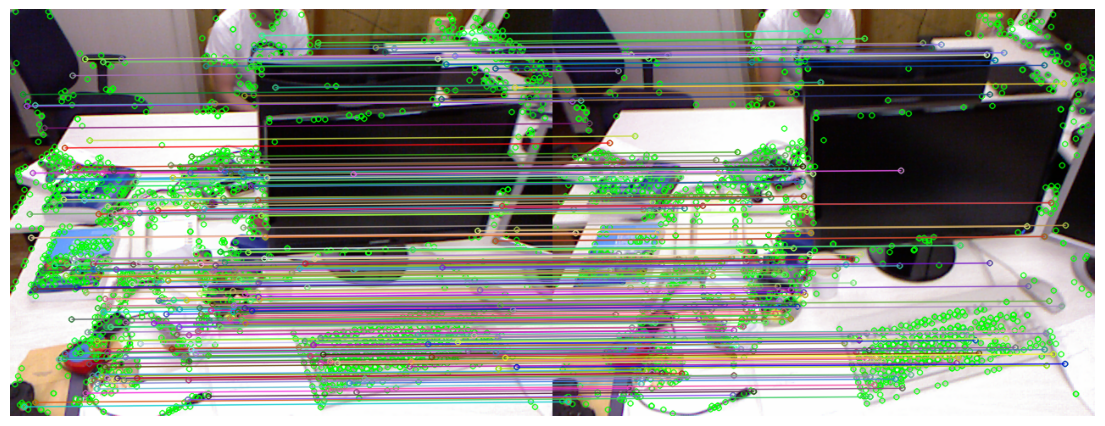

In [48]:
kp1, kp2, matched, des1, des2 = match_images(img_1,img_2)

In [ ]:
des2.shape

(1584, 128)

In [43]:
p1 = []
p2 = []

for match in matched:
    p1.append(kp1[match[0].queryIdx].pt)
    p2.append(kp2[match[0].trainIdx].pt)

In [46]:
len(p2)

268

In [10]:
def get_pixel_coordinates(img, depth):
    pass

In [11]:

depth_instensity = np.array(256 * depth_1 / 0x0fff,
                            dtype=np.uint8)

In [12]:
print(depth_1.max())
# depth_1 *=3

72


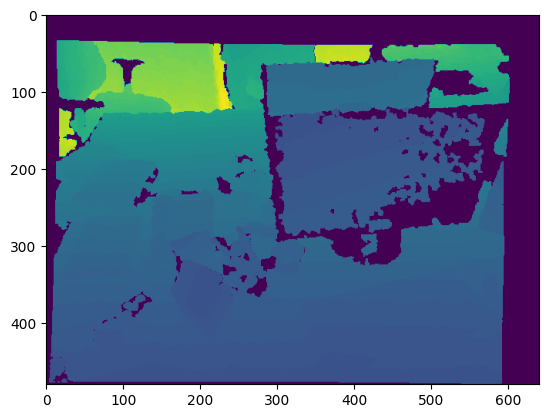

In [13]:
plt.imshow(depth_1)

In [14]:
depth_1[0,0]

0

In [15]:
depth_1 = depth_1 * 3

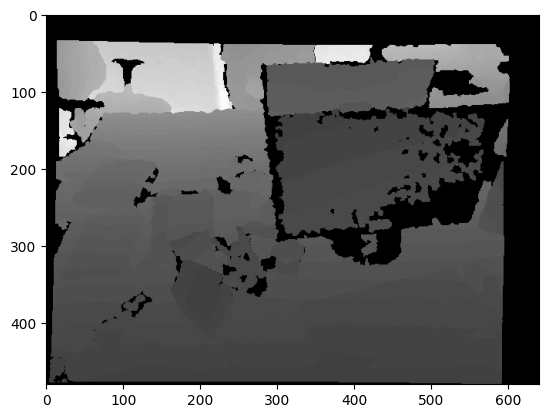

In [16]:
plt.imshow(depth_1,cmap='gray')

In [17]:
def camera_intrinsic_transform(vfov=45,hfov=60,pixel_width=320,pixel_height=240):
    camera_intrinsics = np.zeros((3,4))
    camera_intrinsics[2,2] = 1
    camera_intrinsics[0,0] = (pixel_width/2.0)/math.tan(math.radians(hfov/2.0))
    camera_intrinsics[0,2] = pixel_width/2.0
    camera_intrinsics[1,1] = (pixel_height/2.0)/math.tan(math.radians(vfov/2.0))
    camera_intrinsics[1,2] = pixel_height/2.0
    return camera_intrinsics

cam_params = camera_intrinsic_transform()

In [18]:
# # Depth camera parameters:
# FX_DEPTH = cam_params[0,0]
# FY_DEPTH = cam_params[1,1]
# CX_DEPTH = cam_params[0,2]
# CY_DEPTH = cam_params[1,2]

FX_DEPTH = 525.0  # focal length x
FY_DEPTH = 525.0  # focal length y
CX_DEPTH = 319.5  # optical center x
CY_DEPTH = 239.5  # optical center y

In [56]:
# compute point cloud:
factor = 5000 # for the 16-bit PNG files
pcd = []
height, width = depth_1.shape
for i in range(height):
   for j in range(width):
       if(depth_1[i][j] == 0):
           continue
       z = depth_1[i][j]/factor
       x = (j - CX_DEPTH) * z / FX_DEPTH
       y = (i - CY_DEPTH) * z / FY_DEPTH
       pcd.append([x, y, z])

In [20]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [57]:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd)  # set pcd_np as the point cloud points
# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])